In [1]:
import scanpy as sc
import pandas as pd

In [2]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [3]:
# Step 1: Compute the highly variable genes
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=None)
# sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=None)

# Step 2: Convert to a DataFrame to filter by the percentile
hvg_df = pd.DataFrame({
    'gene': adata.var_names,
    'dispersions_norm': adata.var['dispersions_norm'],
    'highly_variable': adata.var['highly_variable']
})

# Step 3: Get the fifteenth percentile threshold
dispersion_threshold = hvg_df['dispersions_norm'].quantile(0.15)
# dispersion_threshold = hvg_df['dispersions_norm'].quantile(0.85)

# Step 4: Filter the genes that are above this threshold
filtered_genes = hvg_df[hvg_df['dispersions_norm'] > dispersion_threshold]

# Step 5: Get the list of filtered highly variable genes
selected_genes = filtered_genes[filtered_genes['highly_variable']].index.tolist()
selected_genes_cell_ranger = selected_genes

sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=None)
hvg_df = pd.DataFrame({
    'gene': adata.var_names,
    'dispersions_norm': adata.var['dispersions_norm'],
    'highly_variable': adata.var['highly_variable']
})
dispersion_threshold = hvg_df['dispersions_norm'].quantile(0.15)
filtered_genes = hvg_df[hvg_df['dispersions_norm'] > dispersion_threshold]
selected_genes = filtered_genes[filtered_genes['highly_variable']].index.tolist()
selected_genes_seurat = selected_genes

sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=5273)
selected_genes = adata.var_names[adata.var['highly_variable']].tolist()
selected_genes_seurat_n_top = selected_genes


In [4]:
# import matplotlib.pyplot as plt

# # Plot histogram of dispersions_norm
# hvg_df['dispersions_norm'].hist(bins=100, alpha=0.7)
# plt.xlabel('Dispersions (Normalized)')
# plt.ylabel('Frequency')
# plt.grid(True)
# # q = 0.85
# qs = [0.05, 0.15, 0.5, 0.3, 0.85]   
# for q in qs:
#     # Calculate the 85th percentile
#     quantile_q = hvg_df['dispersions_norm'].quantile(q)

#     # Add a vertical line at the 85th percentile
#     plt.axvline(quantile_q, color='red', linestyle='dashed', linewidth=1.5, label=f'{q}th Percentile: {quantile_q:.2f}')

# # Add a legend to describe the line
# plt.legend()

# # Show the plot
# plt.show()


In [5]:
len(selected_genes)

5334

In [6]:
len(filtered_genes)

18245

In [7]:
adata.shape

(16985, 21465)

In [8]:
# from https://humantfs.ccbr.utoronto.ca/download.php
tf_df = pd.read_csv('../data/DatabaseExtract_v_1.01.csv', index_col=0)

In [9]:
# take intersection of tf_df['HGNC symbol'] with selected_genes
selected_genes_tf = list(set(selected_genes) & set(tf_df['HGNC symbol']))
selected_genes_non_tf = list(set(selected_genes) - set(tf_df['HGNC symbol']))

In [10]:
len(selected_genes_tf)
len(selected_genes_non_tf)

4747

In [11]:
import pickle
path = '../data/gene_list/'
with open(f'{path}/v2_tf_var_all.pkl', 'rb') as f:
    tf_tf_all = pickle.load(f)


In [12]:
alex_genes = [c.strip('_y') for c in tf_tf_all.columns]
alex_tfs = [c.strip('_x') for c in tf_tf_all.index]


In [13]:
# get len of alex_gens intersetct with alex_tfs
len(set(alex_genes) & set(alex_tfs))

75

In [14]:
# get len of alex_tfs intersetct with selected_genes_tf
len(set(alex_tfs) & set(selected_genes_tf))


145

In [15]:
# get len of alex_genes intersetct with selected_genes_non_tf
len(set(alex_genes) & set(selected_genes_non_tf))

1232

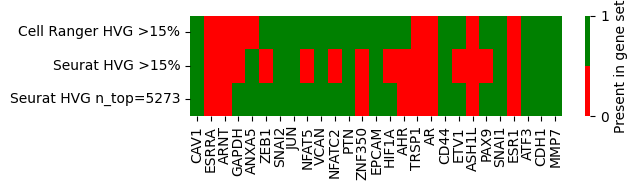

In [16]:
genes_to_check = ['AHR', 'AR', 'ARNT', 'CDH1', 'ESR1', 'ESRRA', 'JUN', 'SNAI1', 'SNAI2', 'ZEB1']
genes_to_check += ['ATF3', 'ESRRA', 'ZEB1', 'CDH1']
genes_to_check += ['GAPDH']
genes_to_check += ['HIF1A']
genes_to_check += ['PTN', 'EPCAM', 'CAV1', 'MMP7', 'VCAN', 'ANXA5', 'CD44']
genes_to_check += ['ESRRA', 'ETV1', 'NFATC2', 'NFAT5', 'ASH1L', 'ZEB1', 'ARNT', 'TRSP1', 'ZNF350']
genes_to_check += ['PAX9']
genes_to_check = list(set(genes_to_check))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary matrix
presence_matrix = np.zeros((3, len(genes_to_check)))
for i, gene in enumerate(genes_to_check):
    presence_matrix[0, i] = gene in selected_genes_cell_ranger
    presence_matrix[1, i] = gene in selected_genes_seurat
    presence_matrix[2, i] = gene in selected_genes_seurat_n_top

# Create heatmap
plt.figure(figsize=(len(genes_to_check)/4, 2))
sns.heatmap(presence_matrix, 
            xticklabels=genes_to_check,
            yticklabels=['Cell Ranger HVG >15%', 'Seurat HVG >15%', 'Seurat HVG n_top=5273'],
            cmap=sns.color_palette(['red', 'green']),
            cbar=True,
            cbar_kws={'label': 'Present in gene set', 'ticks': [0, 1], },
            fmt='.2f')
plt.tight_layout()
plt.show()

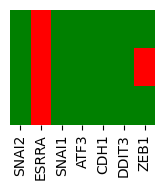

In [17]:
genes_to_check = []
# genes_to_check += ['AHR', 'AR', 'ARNT', 'CDH1', 'ESR1', 'ESRRA', 'JUN', 'SNAI1', 'SNAI2', 'ZEB1']
genes_to_check += ['ATF3', 'ESRRA', 'ZEB1', 'CDH1', 'SNAI1', 'SNAI2', 'DDIT3']
# genes_to_check += ['GAPDH']
# genes_to_check += ['HIF1A']
# genes_to_check += ['PTN', 'EPCAM', 'CAV1', 'MMP7', 'VCAN', 'ANXA5', 'CD44']
# genes_to_check += ['ESRRA', 'ETV1', 'NFATC2', 'NFAT5', 'ASH1L', 'ZEB1', 'ARNT', 'TRSP1', 'ZNF350']
# genes_to_check += ['PAX9']

genes_to_check = list(set(genes_to_check))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary matrix
presence_matrix = np.zeros((3, len(genes_to_check)))
for i, gene in enumerate(genes_to_check):
    presence_matrix[0, i] = gene in selected_genes_cell_ranger
    presence_matrix[1, i] = gene in selected_genes_seurat
    presence_matrix[2, i] = gene in selected_genes_seurat_n_top

# Create heatmap
plt.figure(figsize=(len(genes_to_check)/4, 2))
sns.heatmap(presence_matrix, 
            xticklabels=genes_to_check,
            # yticklabels=['Cell Ranger HVG >15%', 'Seurat HVG >15%', 'Seurat HVG n_top=5273'],
            yticklabels=[],
            cmap=sns.color_palette(['red', 'green']),
            cbar=False,
            # cbar_kws={'label': 'Present in gene set', 'ticks': [0, 1], },
            fmt='.2f')
plt.tight_layout()
plt.show()

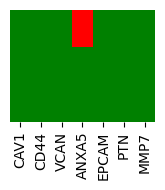

In [18]:
genes_to_check = []
# genes_to_check += ['AHR', 'AR', 'ARNT', 'CDH1', 'ESR1', 'ESRRA', 'JUN', 'SNAI1', 'SNAI2', 'ZEB1']
# genes_to_check += ['ATF3', 'ESRRA', 'ZEB1', 'CDH1', 'SNAI1', 'SNAI2', 'DDIT3']
# genes_to_check += ['GAPDH']
# genes_to_check += ['HIF1A']
genes_to_check += ['PTN', 'EPCAM', 'CAV1', 'MMP7', 'VCAN', 'ANXA5', 'CD44']
# genes_to_check += ['ESRRA', 'ETV1', 'NFATC2', 'NFAT5', 'ASH1L', 'ZEB1', 'ARNT', 'TRSP1', 'ZNF350']
# genes_to_check += ['PAX9']

genes_to_check = list(set(genes_to_check))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary matrix
presence_matrix = np.zeros((3, len(genes_to_check)))
for i, gene in enumerate(genes_to_check):
    presence_matrix[0, i] = gene in selected_genes_cell_ranger
    presence_matrix[1, i] = gene in selected_genes_seurat
    presence_matrix[2, i] = gene in selected_genes_seurat_n_top

# Create heatmap
plt.figure(figsize=(len(genes_to_check)/4, 2))
sns.heatmap(presence_matrix, 
            xticklabels=genes_to_check,
            # yticklabels=['Cell Ranger HVG >15%', 'Seurat HVG >15%', 'Seurat HVG n_top=5273'],
            yticklabels=[],
            cmap=sns.color_palette(['red', 'green']),
            cbar=False,
            # cbar_kws={'label': 'Present in gene set', 'ticks': [0, 1], },
            fmt='.2f')
plt.tight_layout()
plt.show()

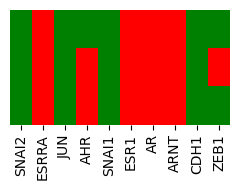

In [19]:
genes_to_check = []
genes_to_check += ['AHR', 'AR', 'ARNT', 'CDH1', 'ESR1', 'ESRRA', 'JUN', 'SNAI1', 'SNAI2', 'ZEB1']
# genes_to_check += ['ATF3', 'ESRRA', 'ZEB1', 'CDH1', 'SNAI1', 'SNAI2', 'DDIT3']
# genes_to_check += ['GAPDH']
# genes_to_check += ['HIF1A']
# genes_to_check += ['PTN', 'EPCAM', 'CAV1', 'MMP7', 'VCAN', 'ANXA5', 'CD44']
# genes_to_check += ['ESRRA', 'ETV1', 'NFATC2', 'NFAT5', 'ASH1L', 'ZEB1', 'ARNT', 'TRSP1', 'ZNF350']
# genes_to_check += ['PAX9']

genes_to_check = list(set(genes_to_check))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary matrix
presence_matrix = np.zeros((3, len(genes_to_check)))
for i, gene in enumerate(genes_to_check):
    presence_matrix[0, i] = gene in selected_genes_cell_ranger
    presence_matrix[1, i] = gene in selected_genes_seurat
    presence_matrix[2, i] = gene in selected_genes_seurat_n_top

# Create heatmap
plt.figure(figsize=(len(genes_to_check)/4, 2))
sns.heatmap(presence_matrix, 
            xticklabels=genes_to_check,
            # yticklabels=['Cell Ranger HVG >15%', 'Seurat HVG >15%', 'Seurat HVG n_top=5273'],
            yticklabels=[],
            cmap=sns.color_palette(['red', 'green']),
            cbar=False,
            # cbar_kws={'label': 'Present in gene set', 'ticks': [0, 1], },
            fmt='.2f')
plt.tight_layout()
plt.show()

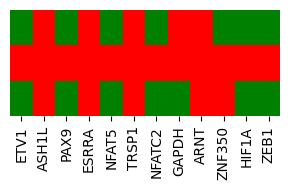

In [20]:
genes_to_check = []
# genes_to_check += ['AHR', 'AR', 'ARNT', 'CDH1', 'ESR1', 'ESRRA', 'JUN', 'SNAI1', 'SNAI2', 'ZEB1']
# genes_to_check += ['ATF3', 'ESRRA', 'ZEB1', 'CDH1', 'SNAI1', 'SNAI2', 'DDIT3']
genes_to_check += ['GAPDH']
genes_to_check += ['HIF1A']
# genes_to_check += ['PTN', 'EPCAM', 'CAV1', 'MMP7', 'VCAN', 'ANXA5', 'CD44']
genes_to_check += ['ESRRA', 'ETV1', 'NFATC2', 'NFAT5', 'ASH1L', 'ZEB1', 'ARNT', 'TRSP1', 'ZNF350']
genes_to_check += ['PAX9']

genes_to_check = list(set(genes_to_check))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary matrix
presence_matrix = np.zeros((3, len(genes_to_check)))
for i, gene in enumerate(genes_to_check):
    presence_matrix[0, i] = gene in selected_genes_cell_ranger
    presence_matrix[1, i] = gene in selected_genes_seurat
    presence_matrix[2, i] = gene in selected_genes_seurat_n_top

# Create heatmap
plt.figure(figsize=(len(genes_to_check)/4, 2))
sns.heatmap(presence_matrix, 
            xticklabels=genes_to_check,
            # yticklabels=['Cell Ranger HVG >15%', 'Seurat HVG >15%', 'Seurat HVG n_top=5273'],
            yticklabels=[],
            cmap=sns.color_palette(['red', 'green']),
            cbar=False,
            # cbar_kws={'label': 'Present in gene set', 'ticks': [0, 1], },
            fmt='.2f')
plt.tight_layout()
plt.show()

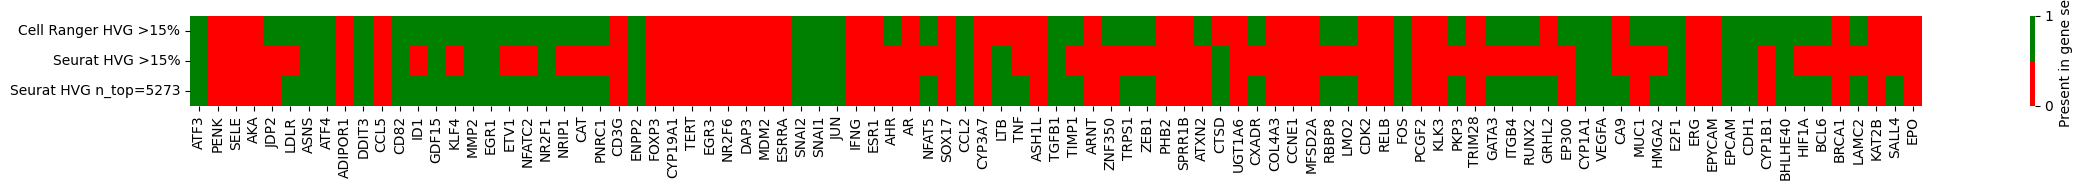

In [21]:
genes_to_check = [
    # Gene Cluster 2
    "ATF3", "PENK", "SELE", "AKA", "JDP2", "LDLR", "ASNS", "ATF4", 
    "ADIPOR1", "DDIT3", "CCL5", "CD82", "ID1", "GDF15", "KLF4", 
    "MMP2", "EGR1",
    
    # Gene Cluster 3
    "ETV1", "NFATC2", "NR2F1", "NRIP1", "CAT", "PNRC1", "CD3G", 
    "ENPP2", "FOXP3", "CYP19A1", "TERT", "EGR3", "NR2F6", "DAP3", 
    "MDM2", "ESRRA", "SNAI2", "SNAI1", "JUN", "IFNG", "ESR1", 
    "AHR", "AR",
    
    # Gene Cluster 4
    "NFAT5", "SOX17", "CCL2", "CYP3A7", "LTB", "TNF", "ASH1L", 
    "TGFB1", "TIMP1",
    
    # Gene Cluster 5
    "ARNT", "ZNF350", "TRPS1", "ZEB1", "PHB2", "SPRR1B", "ATXN2", 
    "CTSD", "UGT1A6", "CXADR", "COL4A3", "CCNE1", "MFSD2A", 
    "RBBP8", "LMO2", "CDK2", "RELB", "FOS", "PCGF2", "KLK3", 
    "PKP3", "TRIM28", "GATA3", "ITGB4", "RUNX2", "GRHL2", 
    "EP300", "CYP1A1", "VEGFA", "CA9", "MUC1", "HMGA2", 
    "E2F1", "ERG", "EPYCAM", "EPCAM", "CDH1", "CYP1B1", 
    "BHLHE40", "HIF1A", "BCL6", "BRCA1", "LAMC2", "KAT2B", 
    "SALL4", "EPO"
]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary matrix
presence_matrix = np.zeros((3, len(genes_to_check)))
for i, gene in enumerate(genes_to_check):
    presence_matrix[0, i] = gene in selected_genes_cell_ranger
    presence_matrix[1, i] = gene in selected_genes_seurat
    presence_matrix[2, i] = gene in selected_genes_seurat_n_top

# Create heatmap
plt.figure(figsize=(len(genes_to_check)/4, 2))
sns.heatmap(presence_matrix, 
            xticklabels=genes_to_check,
            yticklabels=['Cell Ranger HVG >15%', 'Seurat HVG >15%', 'Seurat HVG n_top=5273'],
            cmap=sns.color_palette(['red', 'green']),
            cbar=True,
            cbar_kws={'label': 'Present in gene set', 'ticks': [0, 1], },
            )
plt.tight_layout()
plt.show()

/tmp/ipykernel_2987482/475347472.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


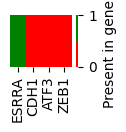

In [22]:
genes_to_check = []
# genes_to_check += ['AHR', 'AR', 'ARNT', 'CDH1', 'ESR1', 'ESRRA', 'JUN', 'SNAI1', 'SNAI2', 'ZEB1']
genes_to_check += ['ATF3', 'ESRRA', 'ZEB1', 'CDH1']
# genes_to_check += ['GAPDH']
# genes_to_check += ['HIF1A']
# genes_to_check += ['PTN', 'EPCAM', 'CAV1', 'MMP7', 'VCAN', 'ANXA5', 'CD44']
# genes_to_check += ['ESRRA', 'ETV1', 'NFATC2', 'NFAT5', 'ASH1L', 'ZEB1', 'ARNT', 'TRSP1', 'ZNF350']
# genes_to_check += ['PAX9']
genes_to_check = list(set(genes_to_check))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary matrix
presence_matrix = np.zeros((1, len(genes_to_check)))
for i, gene in enumerate(genes_to_check):
    presence_matrix[0, i] = gene in alex_genes

# Create heatmap
plt.figure(figsize=(len(genes_to_check)/4, 2/3))
sns.heatmap(presence_matrix, 
            xticklabels=genes_to_check,
            yticklabels=[],
            cmap=sns.color_palette(['red', 'green']),
            cbar=True,
            cbar_kws={'label': 'Present in gene set', 'ticks': [0, 1], },
            fmt='.2f')
plt.tight_layout()
plt.show()

/tmp/ipykernel_2987482/4199830896.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


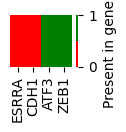

In [23]:
genes_to_check = []
# genes_to_check += ['AHR', 'AR', 'ARNT', 'CDH1', 'ESR1', 'ESRRA', 'JUN', 'SNAI1', 'SNAI2', 'ZEB1']
genes_to_check += ['ATF3', 'ESRRA', 'ZEB1', 'CDH1']
# genes_to_check += ['GAPDH']
# genes_to_check += ['HIF1A']
# genes_to_check += ['PTN', 'EPCAM', 'CAV1', 'MMP7', 'VCAN', 'ANXA5', 'CD44']
# genes_to_check += ['ESRRA', 'ETV1', 'NFATC2', 'NFAT5', 'ASH1L', 'ZEB1', 'ARNT', 'TRSP1', 'ZNF350']
# genes_to_check += ['PAX9']
genes_to_check = list(set(genes_to_check))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary matrix
presence_matrix = np.zeros((1, len(genes_to_check)))
for i, gene in enumerate(genes_to_check):
    presence_matrix[0, i] = gene in alex_tfs

# Create heatmap
plt.figure(figsize=(len(genes_to_check)/4, 2/3))
sns.heatmap(presence_matrix, 
            xticklabels=genes_to_check,
            yticklabels=[],
            cmap=sns.color_palette(['red', 'green']),
            cbar=True,
            cbar_kws={'label': 'Present in gene set', 'ticks': [0, 1], },
            fmt='.2f')
plt.tight_layout()
plt.show()

/tmp/ipykernel_2987482/2396881276.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


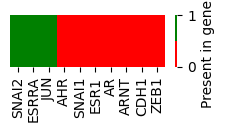

In [24]:
genes_to_check = []
genes_to_check += ['AHR', 'AR', 'ARNT', 'CDH1', 'ESR1', 'ESRRA', 'JUN', 'SNAI1', 'SNAI2', 'ZEB1']
# genes_to_check += ['ATF3', 'ESRRA', 'ZEB1', 'CDH1']
# genes_to_check += ['GAPDH']
# genes_to_check += ['HIF1A']
# genes_to_check += ['PTN', 'EPCAM', 'CAV1', 'MMP7', 'VCAN', 'ANXA5', 'CD44']
# genes_to_check += ['ESRRA', 'ETV1', 'NFATC2', 'NFAT5', 'ASH1L', 'ZEB1', 'ARNT', 'TRSP1', 'ZNF350']
# genes_to_check += ['PAX9']
genes_to_check = list(set(genes_to_check))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary matrix
presence_matrix = np.zeros((1, len(genes_to_check)))
for i, gene in enumerate(genes_to_check):
    presence_matrix[0, i] = gene in alex_genes

# Create heatmap
plt.figure(figsize=(len(genes_to_check)/4, 2/3))
sns.heatmap(presence_matrix, 
            xticklabels=genes_to_check,
            yticklabels=[],
            cmap=sns.color_palette(['red', 'green']),
            cbar=True,
            cbar_kws={'label': 'Present in gene set', 'ticks': [0, 1], },
            fmt='.2f')
plt.tight_layout()
plt.show()

/tmp/ipykernel_2987482/296161394.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


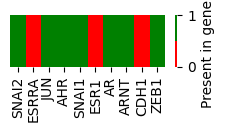

In [25]:
genes_to_check = []
genes_to_check += ['AHR', 'AR', 'ARNT', 'CDH1', 'ESR1', 'ESRRA', 'JUN', 'SNAI1', 'SNAI2', 'ZEB1']
# genes_to_check += ['ATF3', 'ESRRA', 'ZEB1', 'CDH1']
# genes_to_check += ['GAPDH']
# genes_to_check += ['HIF1A']
# genes_to_check += ['PTN', 'EPCAM', 'CAV1', 'MMP7', 'VCAN', 'ANXA5', 'CD44']
# genes_to_check += ['ESRRA', 'ETV1', 'NFATC2', 'NFAT5', 'ASH1L', 'ZEB1', 'ARNT', 'TRSP1', 'ZNF350']
# genes_to_check += ['PAX9']
genes_to_check = list(set(genes_to_check))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary matrix
presence_matrix = np.zeros((1, len(genes_to_check)))
for i, gene in enumerate(genes_to_check):
    presence_matrix[0, i] = gene in alex_tfs

# Create heatmap
plt.figure(figsize=(len(genes_to_check)/4, 2/3))
sns.heatmap(presence_matrix, 
            xticklabels=genes_to_check,
            yticklabels=[],
            cmap=sns.color_palette(['red', 'green']),
            cbar=True,
            cbar_kws={'label': 'Present in gene set', 'ticks': [0, 1], },
            fmt='.2f')
plt.tight_layout()
plt.show()

/tmp/ipykernel_2987482/1835109855.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


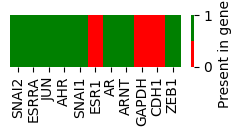

In [26]:
genes_to_check = []
genes_to_check += ['AHR', 'AR', 'ARNT', 'CDH1', 'ESR1', 'ESRRA', 'JUN', 'SNAI1', 'SNAI2', 'ZEB1']
# genes_to_check += ['ATF3', 'ESRRA', 'ZEB1', 'CDH1']
genes_to_check += ['GAPDH']
# genes_to_check += ['HIF1A']
# genes_to_check += ['PTN', 'EPCAM', 'CAV1', 'MMP7', 'VCAN', 'ANXA5', 'CD44']
# genes_to_check += ['ESRRA', 'ETV1', 'NFATC2', 'NFAT5', 'ASH1L', 'ZEB1', 'ARNT', 'TRSP1', 'ZNF350']
# genes_to_check += ['PAX9']
genes_to_check = list(set(genes_to_check))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary matrix
presence_matrix = np.zeros((1, len(genes_to_check)))
for i, gene in enumerate(genes_to_check):
    presence_matrix[0, i] = gene in alex_genes + alex_tfs 

# Create heatmap
plt.figure(figsize=(len(genes_to_check)/4, 2/3))
sns.heatmap(presence_matrix, 
            xticklabels=genes_to_check,
            yticklabels=[],
            cmap=sns.color_palette(['red', 'green']),
            cbar=True,
            cbar_kws={'label': 'Present in gene set', 'ticks': [0, 1], },
            fmt='.2f')
plt.tight_layout()
plt.show()

In [28]:
"""
CDH1: gene
ESR1: tf
GAPDH: gene
"""

'\nCDH1: gene\nESR1: tf\nGAPDH: gene\n'

In [29]:
alex_genes += ['CDH1', 'GAPDH']
alex_tfs += ['ESR1']

In [30]:
# Save gene lists to text files
with open('../data/alex_genes.txt', 'w') as f:
    f.write('\n'.join(alex_genes))
    
with open('../data/alex_tfs.txt', 'w') as f:
    f.write('\n'.join(alex_tfs))
